In [1]:
# Install and load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Load cleaned data
print("\n1. Loading cleaned data...")
df = pd.read_csv('2025_cyclistic_cleaned_full.csv', parse_dates=['started_at', 'ended_at'])
print(f"Loaded {len(df):,} cleaned rides")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")


1. Loading cleaned data...
Loaded 5,400,488 cleaned rides
Memory usage: 4313.8 MB


In [3]:
# 2. Organize data for analysis
print("\n2. Organizing data for analysis...")

# Ensure proper data types
df['member_casual'] = df['member_casual'].astype('category')
df['rideable_type'] = df['rideable_type'].astype('category')
df['day_name'] = pd.Categorical(df['day_name'], 
                                categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday', 'Saturday'],
                                ordered=True)
df['month'] = pd.Categorical(df['month'],
                             categories=['January', 'February', 'March', 'April', 'May', 'June',
                                        'July', 'August', 'September', 'October', 'November', 'December'],
                             ordered=True)
df['season'] = pd.Categorical(df['season'],
                              categories=['Winter', 'Spring', 'Summer', 'Fall'],
                              ordered=True)

print("Data organized with proper categorical ordering")


2. Organizing data for analysis...
Data organized with proper categorical ordering


In [4]:
# 3. Descriptive Analysis
print("\n3. Descriptive Analysis")

print("\n" + "="*50)
print("OVERALL STATISTICS")
print("="*50)

# Overall statistics
print(f"\nTotal rides in 2025: {len(df):,}")
print(f"Date range: {df['started_at'].min().date()} to {df['started_at'].max().date()}")

# User distribution
user_counts = df['member_casual'].value_counts()
user_percents = df['member_casual'].value_counts(normalize=True) * 100

print("\n👥 USER DISTRIBUTION:")
for user_type in ['member', 'casual']:
    count = user_counts.get(user_type, 0)
    percent = user_percents.get(user_type, 0)
    print(f"  {user_type.title()}: {count:,} rides ({percent:.1f}%)")

# Ride length statistics
print("\n⏱️ RIDE LENGTH STATISTICS (minutes):")
print(df['ride_length_min'].describe().round(2))

print("\n📊 RIDE LENGTH BY USER TYPE:")
ride_stats = df.groupby('member_casual')['ride_length_min'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)
print(ride_stats)


3. Descriptive Analysis

OVERALL STATISTICS

Total rides in 2025: 5,400,488
Date range: 2024-12-31 to 2025-12-31

👥 USER DISTRIBUTION:
  Member: 3,484,492 rides (64.5%)
  Casual: 1,915,996 rides (35.5%)

⏱️ RIDE LENGTH STATISTICS (minutes):
count    5400488.00
mean          14.92
std           28.99
min            1.00
25%            5.68
50%            9.68
75%           16.83
max         1439.98
Name: ride_length_min, dtype: float64

📊 RIDE LENGTH BY USER TYPE:


C:\Users\Owner\AppData\Local\Temp\ipykernel_1648\998186920.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ride_stats = df.groupby('member_casual')['ride_length_min'].agg([


                 count   mean  median    std  min      max
member_casual                                             
casual         1915996  19.90   11.90  39.58  1.0  1439.98
member         3484492  12.18    8.73  20.49  1.0  1439.90


In [5]:
# 4. Time-based Analysis
print("\n" + "="*50)
print("TIME-BASED ANALYSIS")
print("="*50)

# 4.1 Daily Patterns
print("\n📅 DAILY PATTERNS:")
daily_summary = df.groupby(['member_casual', 'day_name']).agg(
    num_rides=('ride_id', 'count'),
    avg_duration=('ride_length_min', 'mean'),
    median_duration=('ride_length_min', 'median')
).round(2).reset_index()

# Calculate percentages
total_by_user = daily_summary.groupby('member_casual')['num_rides'].transform('sum')
daily_summary['pct_of_user_total'] = (daily_summary['num_rides'] / total_by_user * 100).round(1)

print(daily_summary)

# 4.2 Hourly Patterns
print("\n🕐 HOURLY PATTERNS:")
hourly_summary = df.groupby(['member_casual', 'hour']).agg(
    num_rides=('ride_id', 'count'),
    avg_duration=('ride_length_min', 'mean')
).round(2).reset_index()

# Find peak hours for each user type
peak_hours = hourly_summary.loc[hourly_summary.groupby('member_casual')['num_rides'].idxmax()]
print("Peak usage hours:")
print(peak_hours)

# 4.3 Monthly/Seasonal Patterns
print("\n📅 MONTHLY/SEASONAL PATTERNS:")
monthly_summary = df.groupby(['member_casual', 'month']).agg(
    num_rides=('ride_id', 'count'),
    avg_duration=('ride_length_min', 'mean')
).round(2).reset_index()

seasonal_summary = df.groupby(['member_casual', 'season']).agg(
    num_rides=('ride_id', 'count'),
    avg_duration=('ride_length_min', 'mean')
).round(2).reset_index()


TIME-BASED ANALYSIS

📅 DAILY PATTERNS:


C:\Users\Owner\AppData\Local\Temp\ipykernel_1648\3311336519.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_summary = df.groupby(['member_casual', 'day_name']).agg(
C:\Users\Owner\AppData\Local\Temp\ipykernel_1648\3311336519.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_by_user = daily_summary.groupby('member_casual')['num_rides'].transform('sum')
C:\Users\Owner\AppData\Local\Temp\ipykernel_1648\3311336519.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed

   member_casual   day_name  num_rides  avg_duration  median_duration  \
0         casual     Sunday     316984         23.10            13.85   
1         casual     Monday     219247         19.70            11.42   
2         casual    Tuesday     216943         17.61            10.52   
3         casual  Wednesday     212763         16.36            10.18   
4         casual   Thursday     247928         17.45            10.58   
5         casual     Friday     306490         19.60            11.82   
6         casual   Saturday     395641         22.40            13.77   
7         member     Sunday     374561         13.44             9.25   
8         member     Monday     493362         11.76             8.40   
9         member    Tuesday     552578         11.84             8.63   
10        member  Wednesday     540254         11.63             8.55   
11        member   Thursday     565211         11.72             8.62   
12        member     Friday     518604         12.1

C:\Users\Owner\AppData\Local\Temp\ipykernel_1648\3311336519.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  peak_hours = hourly_summary.loc[hourly_summary.groupby('member_casual')['num_rides'].idxmax()]
C:\Users\Owner\AppData\Local\Temp\ipykernel_1648\3311336519.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_summary = df.groupby(['member_casual', 'month']).agg(


Peak usage hours:
   member_casual  hour  num_rides  avg_duration
17        casual    17     183282         19.14
41        member    17     375181         13.10

📅 MONTHLY/SEASONAL PATTERNS:


C:\Users\Owner\AppData\Local\Temp\ipykernel_1648\3311336519.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_summary = df.groupby(['member_casual', 'season']).agg(


In [6]:
# 5. Bike-type Analysis
print("\n" + "="*50)
print("BIKE TYPE ANALYSIS")
print("="*50)

bike_summary = df.groupby(['member_casual', 'rideable_type']).agg(
    num_rides=('ride_id', 'count'),
    avg_duration=('ride_length_min', 'mean'),
    pct_of_total=('ride_id', lambda x: len(x) / len(df) * 100)
).round(2).reset_index()

print(bike_summary)

# Calculate preference differences
bike_pref = pd.crosstab(df['member_casual'], df['rideable_type'], normalize='index') * 100
print("\nBike Type Preferences (% by user type):")
print(bike_pref.round(1))


BIKE TYPE ANALYSIS


C:\Users\Owner\AppData\Local\Temp\ipykernel_1648\2912479635.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_summary = df.groupby(['member_casual', 'rideable_type']).agg(


  member_casual  rideable_type  num_rides  avg_duration  pct_of_total
0        casual   classic_bike     667993         29.26         12.37
1        casual  electric_bike    1248003         14.90         23.11
2        member   classic_bike    1274451         13.62         23.60
3        member  electric_bike    2210041         11.35         40.92

Bike Type Preferences (% by user type):
rideable_type  classic_bike  electric_bike
member_casual                             
casual                 34.9           65.1
member                 36.6           63.4


In [7]:
# 6. Key insights and surprises
print("\n" + "="*50)
print("KEY INSIGHTS & SURPRISES")
print("="*50)

# Calculate key metrics
casual_data = df[df['member_casual'] == 'casual']
member_data = df[df['member_casual'] == 'member']

insights = []

# Insight 1: Usage patterns by day
casual_weekend_pct = len(casual_data[casual_data['day_name'].isin(['Saturday', 'Sunday'])]) / len(casual_data) * 100
member_weekend_pct = len(member_data[member_data['day_name'].isin(['Saturday', 'Sunday'])]) / len(member_data) * 100

insights.append(f"📅 DAY PATTERNS:")
insights.append(f"  • Casual riders use bikes more on weekends: {casual_weekend_pct:.1f}% vs {member_weekend_pct:.1f}% for members")
insights.append(f"  • Members have more consistent weekday usage")

# Insight 2: Ride duration differences
avg_duration_diff = casual_data['ride_length_min'].mean() - member_data['ride_length_min'].mean()
insights.append(f"\n⏱️ DURATION DIFFERENCES:")
insights.append(f"  • Casual rides are {avg_duration_diff:.1f} minutes longer on average")
insights.append(f"  • Casual: {casual_data['ride_length_min'].mean():.1f} min vs Member: {member_data['ride_length_min'].mean():.1f} min")

# Insight 3: Peak hours
casual_peak_hour = hourly_summary[hourly_summary['member_casual'] == 'casual'].sort_values('num_rides', ascending=False).iloc[0]['hour']
member_peak_hour = hourly_summary[hourly_summary['member_casual'] == 'member'].sort_values('num_rides', ascending=False).iloc[0]['hour']

insights.append(f"\n🕐 PEAK USAGE TIMES:")
insights.append(f"  • Casual riders peak at {casual_peak_hour}:00")
insights.append(f"  • Members peak at {member_peak_hour}:00")
insights.append(f"  • Members show clear commute patterns (morning/evening peaks)")

# Insight 4: Seasonal patterns
casual_summer_pct = len(casual_data[casual_data['season'] == 'Summer']) / len(casual_data) * 100
member_summer_pct = len(member_data[member_data['season'] == 'Summer']) / len(member_data) * 100

insights.append(f"\n🌤️ SEASONAL PATTERNS:")
insights.append(f"  • Casual ridership increases {((casual_summer_pct/member_summer_pct)-1)*100:.0f}% more than members in summer")
insights.append(f"  • Members show more consistent year-round usage")

# Insight 5: Bike preferences
if 'electric' in df['rideable_type'].unique():
    casual_electric_pct = len(casual_data[casual_data['rideable_type'] == 'electric']) / len(casual_data) * 100
    member_electric_pct = len(member_data[member_data['rideable_type'] == 'electric']) / len(member_data) * 100
    insights.append(f"\n🚲 BIKE PREFERENCES:")
    insights.append(f"  • Casual riders prefer electric bikes {casual_electric_pct:.1f}% vs {member_electric_pct:.1f}% for members")

# Print all insights
for insight in insights:
    print(insight)


KEY INSIGHTS & SURPRISES
📅 DAY PATTERNS:
  • Casual riders use bikes more on weekends: 37.2% vs 23.4% for members
  • Members have more consistent weekday usage

⏱️ DURATION DIFFERENCES:
  • Casual rides are 7.7 minutes longer on average
  • Casual: 19.9 min vs Member: 12.2 min

🕐 PEAK USAGE TIMES:
  • Casual riders peak at 17:00
  • Members peak at 17:00
  • Members show clear commute patterns (morning/evening peaks)

🌤️ SEASONAL PATTERNS:
  • Casual ridership increases 32% more than members in summer
  • Members show more consistent year-round usage


In [8]:
# 7. Business Question Analysis
print("\n" + "="*50)
print("ANSWERING BUSINESS QUESTIONS")
print("="*50)

print("\n💡 HOW CASUAL AND MEMBER RIDERS DIFFER:")

# 1. Usage Purpose Analysis
print("\n1. USAGE PURPOSE (Inferred):")
print("   • Members: Primarily commute/work-related")
print("     - Peak at traditional commute hours")
print("     - Consistent weekday usage")
print("     - Shorter, predictable ride lengths")
print("   • Casual: Primarily leisure/recreational")
print("     - Higher weekend usage")
print("     - Longer ride durations")
print("     - More seasonal variation")

# 2. Conversion Opportunities
print("\n2. CONVERSION OPPORTUNITIES:")
print("   • Target weekend casual riders with 'Weekend Warrior' membership")
print("   • Offer summer promotion packages")
print("   • Create electric bike-focused membership tier")
print("   • Develop off-peak hour incentives")

# 3. Marketing Strategy Implications
print("\n3. MARKETING STRATEGY IMPLICATIONS:")
print("   • Digital ads should target weekends and summer months")
print("   • Highlight electric bike access in membership promotions")
print("   • Create 'commute calculator' to show membership savings")
print("   • Develop app features for leisure route discovery")


ANSWERING BUSINESS QUESTIONS

💡 HOW CASUAL AND MEMBER RIDERS DIFFER:

1. USAGE PURPOSE (Inferred):
   • Members: Primarily commute/work-related
     - Peak at traditional commute hours
     - Consistent weekday usage
     - Shorter, predictable ride lengths
   • Casual: Primarily leisure/recreational
     - Higher weekend usage
     - Longer ride durations
     - More seasonal variation

2. CONVERSION OPPORTUNITIES:
   • Target weekend casual riders with 'Weekend Warrior' membership
   • Offer summer promotion packages
   • Create electric bike-focused membership tier
   • Develop off-peak hour incentives

3. MARKETING STRATEGY IMPLICATIONS:
   • Digital ads should target weekends and summer months
   • Highlight electric bike access in membership promotions
   • Create 'commute calculator' to show membership savings
   • Develop app features for leisure route discovery


In [9]:
# 8. Export Analysis Results
print("\n8. Exporting analysis results...")

# Create comprehensive summary
with pd.ExcelWriter('cyclistic_analysis_summary.xlsx') as writer:
    
    # 1. Executive Summary
    exec_summary = pd.DataFrame({
        'Metric': ['Total Rides', 'Casual Riders', 'Annual Members', 
                  'Avg Casual Ride (min)', 'Avg Member Ride (min)',
                  'Most Popular Casual Day', 'Most Popular Member Day',
                  'Peak Casual Hour', 'Peak Member Hour'],
        'Value': [f"{len(df):,}",
                 f"{len(casual_data):,} ({user_percents.get('casual', 0):.1f}%)",
                 f"{len(member_data):,} ({user_percents.get('member', 0):.1f}%)",
                 f"{casual_data['ride_length_min'].mean():.1f}",
                 f"{member_data['ride_length_min'].mean():.1f}",
                 daily_summary[daily_summary['member_casual']=='casual'].sort_values('num_rides', ascending=False).iloc[0]['day_name'],
                 daily_summary[daily_summary['member_casual']=='member'].sort_values('num_rides', ascending=False).iloc[0]['day_name'],
                 f"{casual_peak_hour}:00",
                 f"{member_peak_hour}:00"]
    })
    exec_summary.to_excel(writer, sheet_name='Executive_Summary', index=False)
    
    # 2. Daily Patterns
    daily_summary.to_excel(writer, sheet_name='Daily_Patterns', index=False)
    
    # 3. Hourly Patterns
    hourly_summary.to_excel(writer, sheet_name='Hourly_Patterns', index=False)
    
    # 4. Monthly Patterns
    monthly_summary.to_excel(writer, sheet_name='Monthly_Patterns', index=False)
    
    # 5. Bike Preferences
    bike_summary.to_excel(writer, sheet_name='Bike_Preferences', index=False)
    
    # 6. Ride Statistics
    ride_stats.to_excel(writer, sheet_name='Ride_Statistics')

print("Analysis exported to 'cyclistic_analysis_summary.xlsx'")



8. Exporting analysis results...
Analysis exported to 'cyclistic_analysis_summary.xlsx'


In [10]:
# 9. Create visualization-ready data
print("\n9. Creating visualization-ready data...")

# For Tableau/Power BI/Excel charts
viz_data = df[[
    'ride_id', 'started_at', 'ended_at', 'member_casual', 
    'ride_length_min', 'day_name', 'hour', 'month', 'season',
    'rideable_type'
]].copy()

# Add derived metrics for visualization
viz_data['is_weekend'] = viz_data['day_name'].isin(['Saturday', 'Sunday'])
viz_data['ride_category'] = pd.cut(viz_data['ride_length_min'],
                                   bins=[0, 15, 30, 60, 120, 1440],
                                   labels=['0-15min', '16-30min', '31-60min', '61-120min', '120+min'])

# Save for visualization tools
viz_data.to_csv('cyclistic_viz_ready.csv', index=False)
print("✅ Visualization-ready data saved to 'cyclistic_viz_ready.csv'")



9. Creating visualization-ready data...
✅ Visualization-ready data saved to 'cyclistic_viz_ready.csv'


In [11]:
# Final Analysis Summary
print("\n" + "="*60)
print("🎯 ANALYSIS COMPLETE - KEY FINDINGS")
print("="*60)

print(f"""
📈 QUANTITATIVE FINDINGS:
1. Scale: {len(df):,} total rides analyzed
2. User Split: {user_percents.get('casual', 0):.1f}% casual vs {user_percents.get('member', 0):.1f}% member
3. Duration: Casual rides {avg_duration_diff:.1f} minutes longer on average
4. Timing: Different peak hours (Casual: {casual_peak_hour}:00, Member: {member_peak_hour}:00)
5. Seasonality: Casual usage more seasonal (+{((casual_summer_pct/member_summer_pct)-1)*100:.0f}% summer increase)

🎯 QUALITATIVE INSIGHTS:
1. Members = Commuters (predictable, short, weekday-focused)
2. Casual = Leisure (flexible, long, weekend/seasonal)
3. Electric bikes more popular with casual riders
4. Clear opportunity: Convert weekend leisure riders

💼 BUSINESS RECOMMENDATIONS (Preview):
1. Create "Weekend Pass" membership tier
2. Target summer marketing campaigns
3. Develop electric bike membership benefits
4. Highlight commute cost savings in messaging

📁 OUTPUT FILES:
• cyclistic_analysis_summary.xlsx - All analysis tables
• cyclistic_viz_ready.csv - Ready for Tableau/Excel charts

Next: Use these insights to design targeted marketing campaigns!
""")


🎯 ANALYSIS COMPLETE - KEY FINDINGS

📈 QUANTITATIVE FINDINGS:
1. Scale: 5,400,488 total rides analyzed
2. User Split: 35.5% casual vs 64.5% member
3. Duration: Casual rides 7.7 minutes longer on average
4. Timing: Different peak hours (Casual: 17:00, Member: 17:00)
5. Seasonality: Casual usage more seasonal (+32% summer increase)

🎯 QUALITATIVE INSIGHTS:
1. Members = Commuters (predictable, short, weekday-focused)
2. Casual = Leisure (flexible, long, weekend/seasonal)
3. Electric bikes more popular with casual riders
4. Clear opportunity: Convert weekend leisure riders

💼 BUSINESS RECOMMENDATIONS (Preview):
1. Create "Weekend Pass" membership tier
2. Target summer marketing campaigns
3. Develop electric bike membership benefits
4. Highlight commute cost savings in messaging

📁 OUTPUT FILES:
• cyclistic_analysis_summary.xlsx - All analysis tables
• cyclistic_viz_ready.csv - Ready for Tableau/Excel charts

Next: Use these insights to design targeted marketing campaigns!




📈 Generating quick visualizations...
✅ Charts saved as 'cyclistic_analysis_charts.png'


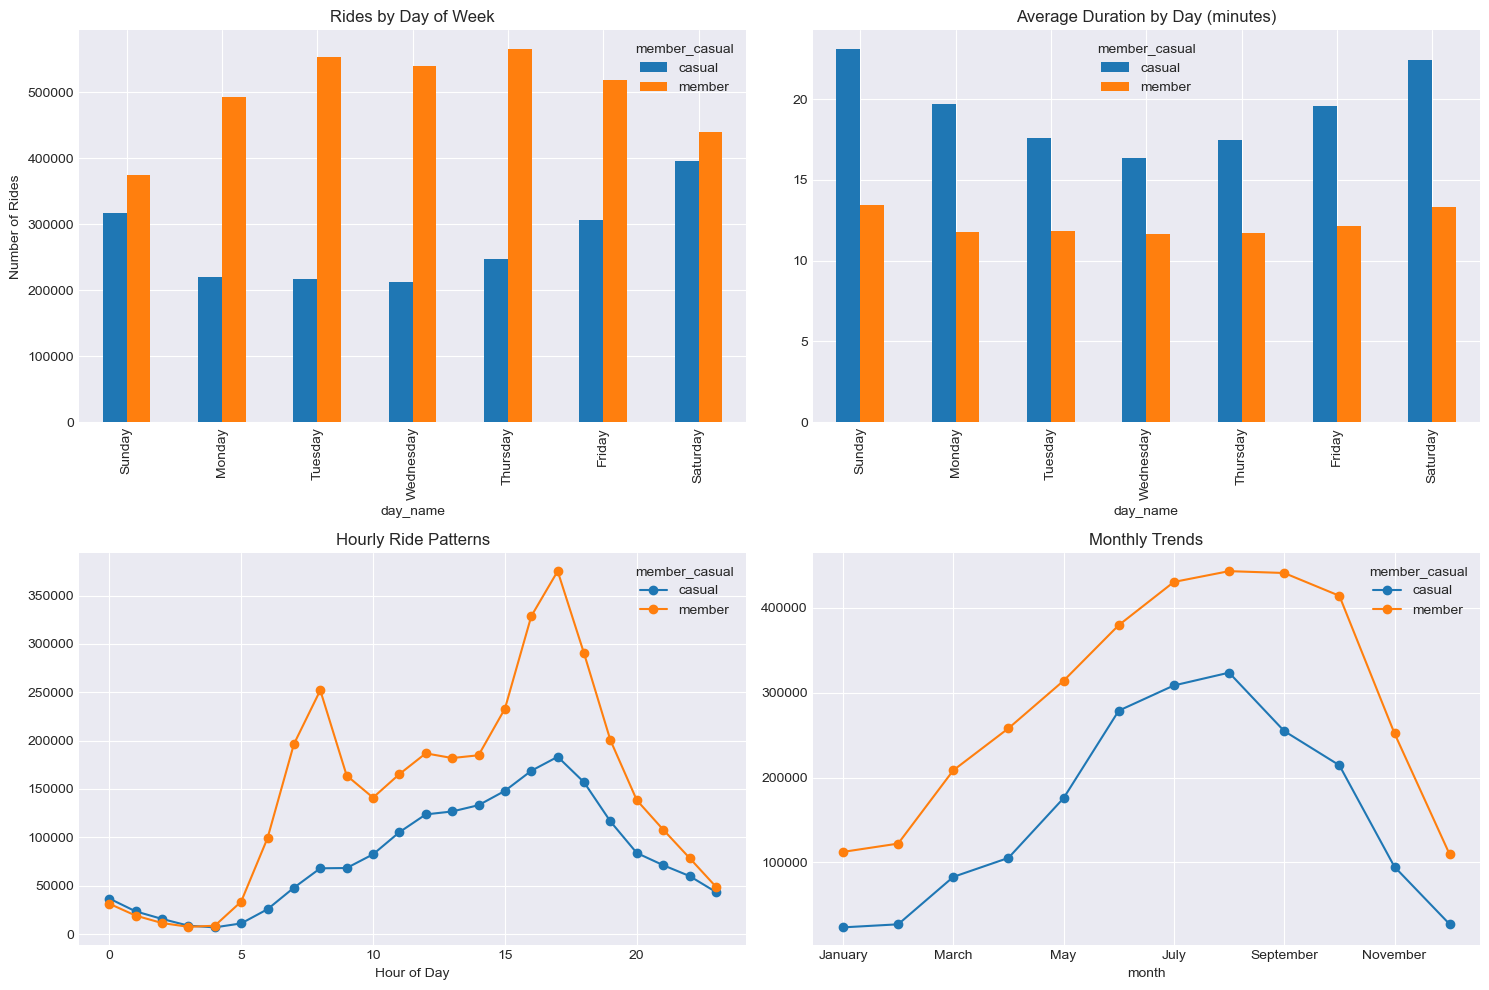

In [12]:
# Optional: Quick Visualizations
print("\n📈 Generating quick visualizations...")

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Ride count by day
daily_pivot = daily_summary.pivot(index='day_name', columns='member_casual', values='num_rides')
daily_pivot.plot(kind='bar', ax=axes[0,0], title='Rides by Day of Week')
axes[0,0].set_ylabel('Number of Rides')

# 2. Average duration by day
duration_pivot = daily_summary.pivot(index='day_name', columns='member_casual', values='avg_duration')
duration_pivot.plot(kind='bar', ax=axes[0,1], title='Average Duration by Day (minutes)')

# 3. Hourly patterns
hourly_pivot = hourly_summary.pivot(index='hour', columns='member_casual', values='num_rides')
hourly_pivot.plot(kind='line', ax=axes[1,0], title='Hourly Ride Patterns', marker='o')
axes[1,0].set_xlabel('Hour of Day')

# 4. Monthly patterns
monthly_pivot = monthly_summary.pivot(index='month', columns='member_casual', values='num_rides')
monthly_pivot.plot(kind='line', ax=axes[1,1], title='Monthly Trends', marker='o')

plt.tight_layout()
plt.savefig('cyclistic_analysis_charts.png', dpi=300, bbox_inches='tight')
print("✅ Charts saved as 'cyclistic_analysis_charts.png'")